In [1]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import scipy 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_excel('colorado_final.xlsx')

In [3]:
df.columns = ['City', 'Population', 'Violent Crime', 'Murder', 'Rape', 'Robbery', 'Assault', 'Property Crime', 'Burgalry', 'Larcency', 'Motor', 'Arson']

In [4]:
df.head()

,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property Crime,Burgalry,Larcency,Motor,Arson
0,Arvada,110792,163,0,33,34,96,2666,331,2138,197,22
1,Aspen,6685,14,0,5,0,9,314,17,286,11,0
2,Ault,1565,0,0,0,0,0,2,0,0,2,0
3,Aurora,343484,1436,23,224,468,721,10786,1981,7805,1000,80
4,Avon,6336,9,0,3,0,6,140,12,124,4,1


In [5]:
df['Population Squared'] = df['Population'] ** 2

In [6]:
df

,City,Population,Violent Crime,Murder,Rape,Robbery,Assault,Property Crime,Burgalry,Larcency,Motor,Arson,Population Squared
0,Arvada,110792,163,0,33,34,96,2666,331,2138,197,22,12274867264
1,Aspen,6685,14,0,5,0,9,314,17,286,11,0,44689225
2,Ault,1565,0,0,0,0,0,2,0,0,2,0,2449225
3,Aurora,343484,1436,23,224,468,721,10786,1981,7805,1000,80,117981258256
4,Avon,6336,9,0,3,0,6,140,12,124,4,1,40144896
5,Basalt,3818,2,0,0,0,2,63,11,50,2,0,14577124
6,Berthoud,5316,3,0,1,1,1,45,13,28,4,0,28259856
7,Black Hawk,119,6,0,3,2,1,205,2,195,8,0,14161
8,Blue River,854,1,0,0,1,0,4,0,4,0,0,729316
9,Boulder,102828,218,0,38,40,140,2948,612,2236,100,27,10573597584


In [7]:
features = pd.get_dummies(df['Murder'])
features['Murder_Rate'] = np.where(df['Murder']>= 1, 1, 0)

In [8]:
print(df['Murder'].groupby(features['Murder_Rate']).describe())

             count      mean       std  min  25%  50%  75%   max
Murder_Rate                                                     
0            111.0  0.000000  0.000000  0.0  0.0  0.0  0.0   0.0
1             24.0  5.583333  9.810893  1.0  1.0  2.0  5.0  40.0


In [9]:
features['Robbery_Rate'] = np.where(df['Robbery'] >= 1, 1, 0)

In [10]:
print(df['Robbery'].groupby(features['Robbery_Rate']).describe())

              count       mean         std  min  25%  50%   75%     max
Robbery_Rate                                                           
0              71.0   0.000000    0.000000  0.0  0.0  0.0   0.0     0.0
1              64.0  45.671875  160.277642  1.0  1.0  3.5  19.0  1132.0


In [11]:
features['Population_Square'] = df['Population'] ** 2

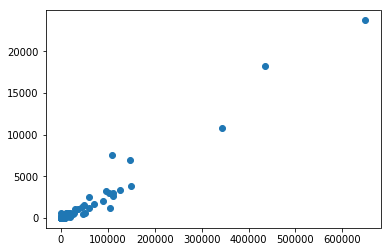

In [33]:
x = df['Population']
y = df['Property Crime']
plt.scatter(x,y)
plt.show()

In [29]:
features['Population_Segment'] = df.loc[df['Population'] < 200000, 'Population']

In [31]:
features['Population_Segment'].dropna()

0      110792.0
1        6685.0
2        1565.0
4        6336.0
5        3818.0
6        5316.0
7         119.0
8         854.0
9      102828.0
10        900.0
11       4568.0
12      59424.0
13       5529.0
14       2678.0
15       3939.0
16        109.0
17      16474.0
18       6522.0
19      52309.0
20       2192.0
21     104771.0
22       2281.0
23        675.0
24       6297.0
26       1315.0
27      49200.0
28       8470.0
29       8909.0
30       1510.0
31       1179.0
         ...   
105      1417.0
106      1100.0
107     47748.0
108    108062.0
109      2479.0
110      9306.0
111      3906.0
112      5346.0
113      5880.0
114      2991.0
115      3921.0
116      2851.0
117       375.0
118      1438.0
119     12008.0
120     14690.0
121       673.0
122      2313.0
123    125775.0
124      1436.0
125      8689.0
126      5241.0
127      2960.0
128       538.0
129    110093.0
130     30882.0
131     20094.0
132      7185.0
133      2373.0
134      3563.0
Name: Population_Segment

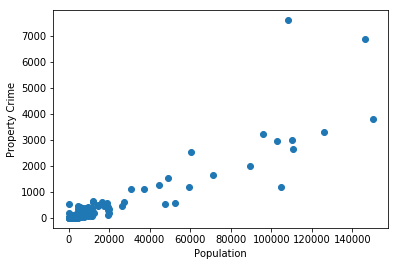

In [58]:
x = features['Population_Segment']
y = df['Property Crime']
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.show()

In [59]:
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


Coefficients: 
 [[ 0.02873714 14.29751819  5.05322771]]

Intercept: 
 [-38.39153525]

R-squared:
0.9630837826662033


ValueError: Expected 2D array, got 1D array instead:
array=[1.10792e+05 6.68500e+03 1.56500e+03         nan 6.33600e+03 3.81800e+03
 5.31600e+03 1.19000e+02 8.54000e+02 1.02828e+05 9.00000e+02 4.56800e+03
 5.94240e+04 5.52900e+03 2.67800e+03 3.93900e+03 1.09000e+02 1.64740e+04
 6.52200e+03 5.23090e+04 2.19200e+03 1.04771e+05 2.28100e+03 6.75000e+02
 6.29700e+03         nan 1.31500e+03 4.92000e+04 8.47000e+03 8.90900e+03
 1.51000e+03 1.17900e+03 4.37300e+03 1.67500e+03 8.79900e+03         nan
 9.06000e+02 1.73030e+04 6.46600e+03 4.57500e+03 5.24100e+03 1.36600e+03
 2.79000e+02 1.96270e+04 6.06400e+03 1.98930e+04 6.67000e+02 1.18940e+04
 1.11280e+04 3.88800e+03 1.50066e+05 7.64900e+03 1.14870e+04 2.71630e+04
 9.63900e+03 2.74000e+03 1.27230e+04 2.43000e+02 1.01900e+03 4.50200e+03
 9.71500e+03 1.93340e+04 1.73300e+03 6.01670e+04 9.61110e+04 1.46140e+04
 5.88400e+03 1.78000e+03 9.17000e+02 2.39000e+03 1.68300e+03 7.09000e+02
 1.14370e+04 1.17100e+03 1.50000e+03 7.17000e+02 2.61450e+04 7.02300e+03
 8.00000e+00 1.46298e+05 7.80100e+03 2.01700e+03 7.73000e+02 2.59600e+03
 1.86400e+03 4.43750e+04 1.20560e+04 8.94340e+04 1.92910e+04 7.13250e+04
 1.34300e+03 5.22000e+03 3.88600e+03 2.52800e+03 5.83900e+03 1.02500e+03
 4.42300e+03 1.89180e+04 5.80000e+03 4.34000e+02 7.99000e+02 4.57100e+03
 3.72320e+04 8.70000e+02 1.71000e+03 1.41700e+03 1.10000e+03 4.77480e+04
 1.08062e+05 2.47900e+03 9.30600e+03 3.90600e+03 5.34600e+03 5.88000e+03
 2.99100e+03 3.92100e+03 2.85100e+03 3.75000e+02 1.43800e+03 1.20080e+04
 1.46900e+04 6.73000e+02 2.31300e+03 1.25775e+05 1.43600e+03 8.68900e+03
 5.24100e+03 2.96000e+03 5.38000e+02 1.10093e+05 3.08820e+04 2.00940e+04
 7.18500e+03 2.37300e+03 3.56300e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

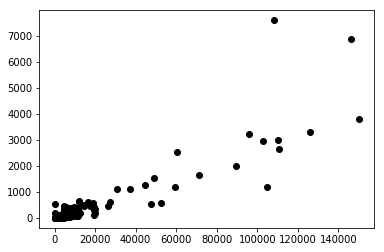

In [105]:
#Comparing Property Crime to Murder and Robbery and Population 

regr = linear_model.LinearRegression()
Y = df['Property Crime'].values.reshape(-1, 1)
X = df[['Population', 'Murder', 'Robbery']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))
plt.scatter(x, Y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()